# Object Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

plt.rcParams['font.family'] = 'IPAexGothic'

In [2]:
TICK_PARAMS = {
    'labelbottom': False,
    'labelleft': False,
    'labelright': False,
    'labeltop': False,
    'bottom': False,
    'left': False,
    'right': False,
    'top': False
}

## Load Images

In [3]:
img = cv2.imread('../../data/pikachu/IMG_0813.jpg')
img = cv2.resize(img, (512, 512))

obj_y1, obj_y2, obj_x1, obj_x2 = 180, 285, 180, 265
obj = img[obj_y1:obj_y2, obj_x1:obj_x2]

tar1 = cv2.imread('../../data/pikachu/IMG_0812.jpg')
tar1 = cv2.resize(tar1, (384, 384))

tar2 = cv2.imread('../../data/pikachu/IMG_0811.jpg')
tar2 = cv2.resize(tar2, (640, 640))

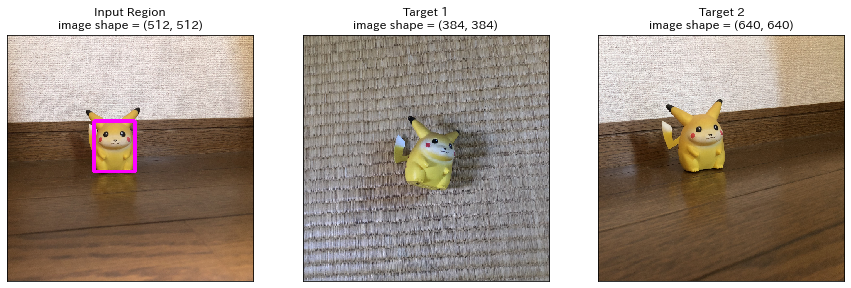

In [4]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.rectangle(img.copy(), (obj_x1, obj_y1), (obj_x2, obj_y2), (255, 0, 255), 5), cv2.COLOR_BGR2RGB))
plt.tick_params(**TICK_PARAMS)
plt.grid(False)
plt.title(f'Input Region\nimage shape = {img.shape[:2]}')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(tar1, cv2.COLOR_BGR2RGB))
plt.tick_params(**TICK_PARAMS)
plt.grid(False)
plt.title(f'Target 1\nimage shape = {tar1.shape[:2]}')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(tar2, cv2.COLOR_BGR2RGB))
plt.tick_params(**TICK_PARAMS)
plt.grid(False)
plt.title(f'Target 2\nimage shape = {tar2.shape[:2]}')

plt.show()

In [5]:
import sys
sys.path += ['../..']
from modules.region_covariance.region_covariance_detector import RegionCovarianceDetector

In [6]:
kernels = [
                np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]]),
                np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]]),
                np.array([[0, 0, 0], [-1, 2, -1], [0, 0, 0]]),
                np.array([[0, -1, 0], [0, 2, 0], [0, -1, 0]])
]
detector = RegionCovarianceDetector(kernels=kernels)
%time detector = detector.fit(obj)

CPU times: user 14 ms, sys: 12 ms, total: 26 ms
Wall time: 30.2 ms


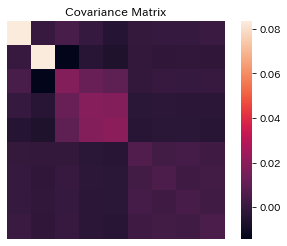

In [7]:
sns.heatmap(detector.object_covariance_, square=True, xticklabels=False, yticklabels=False)
plt.title('Covariance Matrix')
plt.show()

In [8]:
%time (tar1_x1, tar1_y1), (tar1_x2, tar1_y2), score1 = detector.predict(tar1)
%time (tar2_x1, tar2_y1), (tar2_x2, tar2_y2), score2 = detector.predict(tar2)

9it [00:05,  1.53it/s]


CPU times: user 10.3 s, sys: 1.21 s, total: 11.5 s
Wall time: 6.22 s


9it [00:18,  2.09s/it]

CPU times: user 32.5 s, sys: 3.84 s, total: 36.3 s
Wall time: 19.7 s


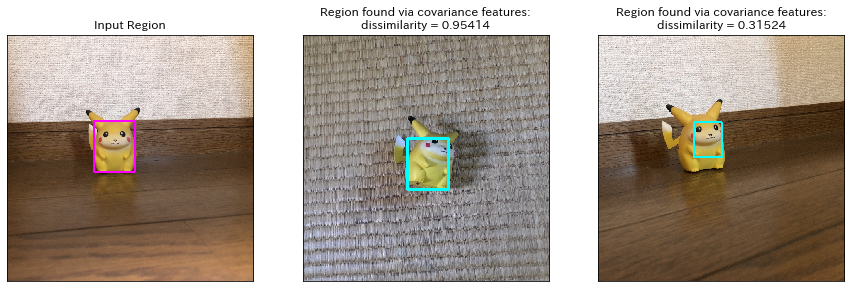

In [9]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.rectangle(img.copy(), (obj_x1, obj_y1), (obj_x2, obj_y2), (255, 0, 255), 3), cv2.COLOR_BGR2RGB))
plt.tick_params(**TICK_PARAMS)
plt.grid(False)
plt.title(f'Input Region')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cv2.rectangle(tar1.copy(), (tar1_x1, tar1_y1), (tar1_x2, tar1_y2), (255, 255, 0), 3), cv2.COLOR_BGR2RGB))
plt.tick_params(**TICK_PARAMS)
plt.grid(False)
plt.title(f'Region found via covariance features:\ndissimilarity = {round(score1, 5)}')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cv2.rectangle(tar2.copy(), (tar2_x1, tar2_y1), (tar2_x2, tar2_y2), (255, 255, 0), 3), cv2.COLOR_BGR2RGB))
plt.tick_params(**TICK_PARAMS)
plt.grid(False)
plt.title(f'Region found via covariance features:\ndissimilarity = {round(score2, 5)}')

plt.show()